# Minimal Demo — Hierarchical Refinement (`hiref_lr`) in JAX
This self‑contained demo shows how to call HiRef to align two synthetic point clouds. It includes:
- Lightweight JAX implementation of a balanced low‑rank OT subroutine and hierarchical refinement with cost.
- A simple synthetic dataset generator.
- Visualizations of input clouds and the final matched pairs.dex blocks.

In [12]:
import time
import math
import numpy as np
import jax
import jax.numpy as jnp
from jax import lax
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional
import torch
import sys
import examples
sys.path.insert(0, '../src')
print("JAX version:", jax.__version__)
key = jax.random.PRNGKey(0)

key = jax.random.PRNGKey(0)
k0, k1 = jax.random.split(key)

batch_size1 = 1024
batch_size2 = 1024

X = examples.sample_8gaussians(k0, batch_size1)         # (batch_size1, 2)
Y = examples.sample_moons(batch_size2)   # (batch_size2, 2)


JAX version: 0.6.2


Optimized rank-annealing schedule: [32, 32]
Cost: 9.1406831741333


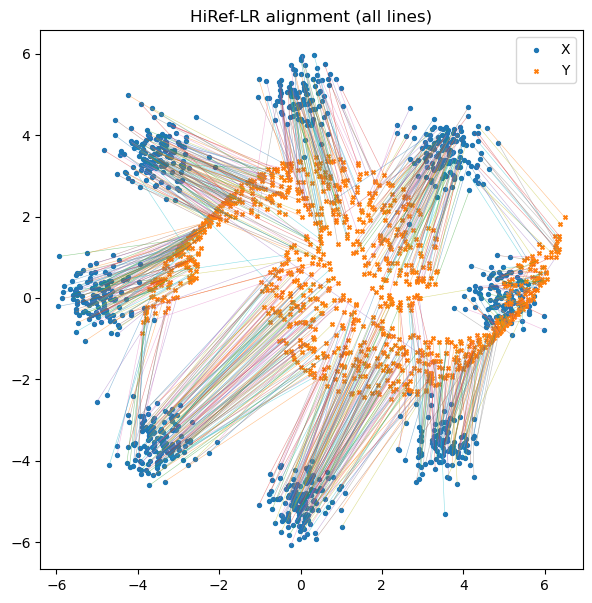

In [13]:
import src.rank_annealing as rank_annealing
import src.HiRef as HiRef
import src.HiRef_fast as HiRef_fast

rank_schedule = rank_annealing.optimal_rank_schedule(1024, hierarchy_depth = 6, max_Q = 50, max_rank = 50 )
iters_per_level = 100
gamma = 40.0

frontier = HiRef.hiref_lr(X, Y, rank_schedule=rank_schedule,
                    base_rank=1,
                    iters_per_level=iters_per_level,
                    gamma=gamma,
                    rescale_cost=False,
                    return_coupling=False)

cost = HiRef.compute_ot_cost(frontier, X, Y, C=None, sq_euclidean=True)
print("Cost:", float(cost))

plot_alignment(frontier, X, Y, max_lines_per_leaf=None, sample_frac=None, title="HiRef-LR alignment (all lines)")

Optimized rank-annealing schedule: [32, 32]
Cost: 9.03150463104248


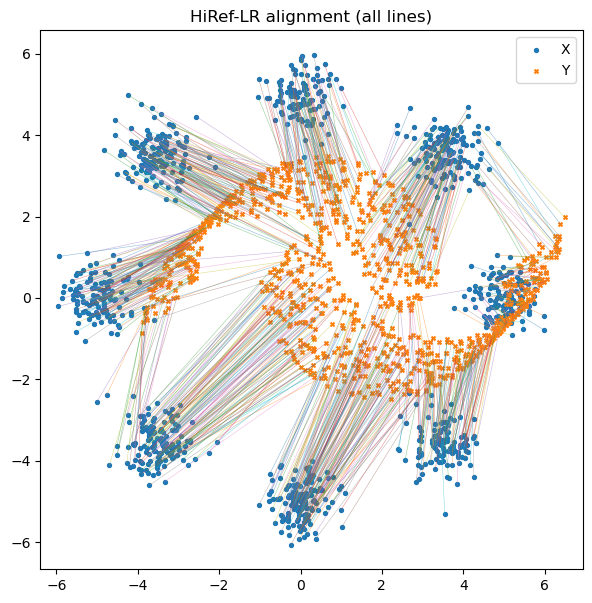

In [14]:

rank_schedule = rank_annealing.optimal_rank_schedule(1024, hierarchy_depth = 6, max_Q = 50, max_rank = 50 )
iters_per_level = 100
gamma = 40.0

frontier = HiRef_fast.hiref_lr_fast(X, Y, rank_schedule=rank_schedule,
                    base_rank=1,
                    iters_per_level=iters_per_level,
                    gamma=gamma,
                    rescale_cost=False,
                    return_coupling=False)

cost = HiRef.compute_ot_cost(frontier, X, Y, C=None, sq_euclidean=True)
print("Cost:", float(cost))

plot_alignment(frontier, X, Y, max_lines_per_leaf=None, sample_frac=None, title="HiRef-LR alignment (all lines)")
